In [31]:
from data_generator import generate_nested_dict
from processor import process_dataframes_multi, process_dataframes_single
from analysers import extract_identifiers, process_offset_dataframe, remove_blank_dfs
import pandas as pd
import numpy as np
import random



In [32]:
dfs = generate_nested_dict(10)
dfs_multi = dfs.copy()
dfs_single = dfs.copy()
len(dfs)

Function generate_nested_dict took 2.27 seconds to run


50

In [33]:
dfs_multi = process_dataframes_multi(dfs_multi, remove_blank_dfs)
len(dfs_multi)

100%|██████████| 554/554 [00:00<00:00, 672.22it/s]

Function process_dataframes_multi took 0.93 seconds to run


43

In [34]:
dfs_multi = process_dataframes_multi(dfs_multi, process_offset_dataframe)
len(dfs_multi)

100%|██████████| 111/111 [00:00<00:00, 152.77it/s]

Function process_dataframes_multi took 0.83 seconds to run


43

In [35]:
dfs_multi = process_dataframes_multi(dfs_multi, extract_identifiers, identifier_type='email')
len(dfs_multi)

100%|██████████| 111/111 [00:00<00:00, 152.72it/s]

Function process_dataframes_multi took 0.83 seconds to run


43

In [36]:
# Get all index refs for dfs that contain all graphable columns

for collection_id, collection in dfs_multi.items():
    for doc_id, df in collection.items():
        if all([item in list(df.columns) for item in ['phone_number', 'email_address', 'email_address2']]):
            print(f"dfs_multi['{collection_id}']['{doc_id}'] - {list(df.columns)}")

dfs_multi['6046931b8148ef57f59e47e182b56400']['9f04f71938b661a63d45ff0ba01b2baa'] - ['first_name', 'last_name', 'email_address', 'date_of_birth', 'gender', 'email_address2', 'phone_number', 'my_emails']
dfs_multi['bcc4fe92ac8246535c42b18bbf825a00']['9ba0a0f03e2238f6dfecd423445b2edc'] - ['first_name', 'last_name', 'gender', 'phone_number', 'date_of_birth', 'email_address', 'email_address2', 'passport', 'my_emails']
dfs_multi['575b9629b06f2ffb5f8ed29efc82750e']['90864e4217a374afbd01de2c8f473611'] - ['first_name', 'last_name', 'date_of_birth', 'passport', 'email_address', 'email_address2', 'gender', 'phone_number', 'my_emails']
dfs_multi['575b9629b06f2ffb5f8ed29efc82750e']['906894b80597875bc52ea4b254ccab39'] - ['first_name', 'last_name', 'phone_number', 'email_address2', 'email_address', 'gender', 'passport', 'date_of_birth', 'my_emails']
dfs_multi['575b9629b06f2ffb5f8ed29efc82750e']['8cd4f9b80265e8fe456277f20ad77cae'] - ['first_name', 'last_name', 'passport', 'gender', 'email_address2', 

In [37]:
# Create small test nested_dict

dfs = [dfs_multi['6046931b8148ef57f59e47e182b56400']['9f04f71938b661a63d45ff0ba01b2baa'],
       dfs_multi['bcc4fe92ac8246535c42b18bbf825a00']['9ba0a0f03e2238f6dfecd423445b2edc'],
       dfs_multi['575b9629b06f2ffb5f8ed29efc82750e']['90864e4217a374afbd01de2c8f473611']]
dfs_test = {}


for i, df in enumerate(dfs):
    dfs_test[f'col{i}'] = {i:df}

In [38]:
dfs_test

{'col0': {0:    first_name last_name               email_address date_of_birth  gender   
  2   Alexander   Collins  alexander.collins@test.com     10/6/1974    male  \
  3     Matthew     Davis      matthew.davis@test.com     4/24/1953    male   
  4      Skylar     Scott       skylar.scott@test.com     6/14/1960  female   
  5     Addison    Bailey     addison.bailey@test.com     7/25/1996  female   
  6      Julian      Hall        julian.hall@test.com     4/12/1981    male   
  ..        ...       ...                         ...           ...     ...   
  63     Hannah     Jones       hannah.jones@test.com     6/28/2005  female   
  64       Luna       Lee           luna.lee@test.com      1/5/2002  female   
  65    Addison    Wright     addison.wright@test.com     8/27/1950  female   
  66        Leo  Martinez       leo.martinez@test.com     4/28/1977    male   
  67   Brooklyn     Brown     brooklyn.brown@test.com     6/11/1973  female   
  
                email_address2   phone

In [39]:
from graph import construct_graph_from_data, render_graph_size, render_graph_web

ImportError: cannot import name 'render_graph_web' from 'graph' (/Users/lucasvannooijen/Documents/python/emailextractor/graph.py)

In [29]:
graph1 = construct_graph_from_data(dfs_test)

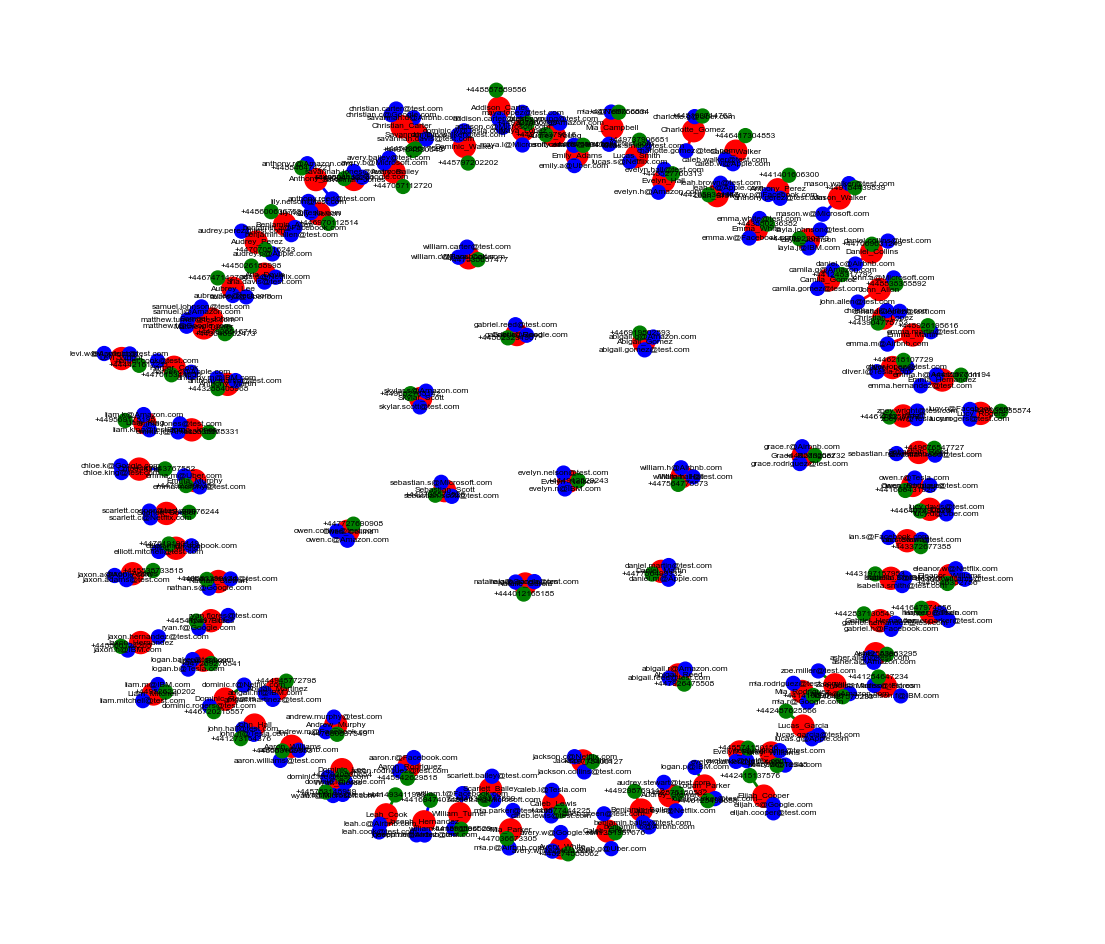

In [30]:
render_graph_size(graph1, figsize = (14, 12))